In [125]:
import os
import gzip
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

#### Pick an ALGO

In [126]:
# ALGO = 'RF'
ALGO = 'GBC'
OUTPUT_DIR = os.getcwd() + '/outputs/' + ALGO + '/'

### Make plot function
A utility function that will be used in the notebook

In [127]:
def make_plot(y_true, y_pred, name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name=name)
    # return disp.plot()
    disp.plot()
    disp.ax_.set_title(name)
    disp.ax_.spines['top'].set_visible(False)
    disp.ax_.spines['right'].set_visible(False)
    disp.ax_.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    return disp

### Prepare data
Make dataframe for each type of mutation

In [128]:
df = pd.read_csv('trainDataFromHitsSplitTrimmedAln.tsv.gz', sep = '\t', low_memory=False)
# Create a new column called Input with the columns Acc and Mutation separated by a /
df['Input'] = df['Acc'] + '/' + df['Mutation']
# Keep only the columns Input, and MUT_TYPE
df = df[['Input', 'MUT_TYPE']]
# df when MUT_TYPE is loss or decrease
df_loss = df[(df['MUT_TYPE'] == 'loss') | (df['MUT_TYPE'] == 'decrease')]
df_loss
# df when MUT_TYPE is activating or increase
df_activating = df[(df['MUT_TYPE'] == 'activating') | (df['MUT_TYPE'] == 'increase')]
df_activating
# df when MUT_TYPE is resistance
df_resistance = df[(df['MUT_TYPE'] == 'resistance')]
df_resistance
# df when MUT_TYPE is neutral
df_neutral = df[(df['MUT_TYPE'] == 'neutral')]
df_neutral

,Input,MUT_TYPE
14,Q00534/D110N,neutral
23,O96017/I448S,neutral
24,Q96Q40/T255I,neutral
35,P24941/T290S,neutral
36,Q00526/T226I,neutral
...,...,...
1032,Q9H3Y6/V255M,neutral
1049,P17948/M938V,neutral
1050,P17948/E982A,neutral
1052,Q8IYT8/P242S,neutral


### Precision-Recall curve and confusion matrix for `AIvLD` in train set

811 811
[[571  62]
 [  6 172]]


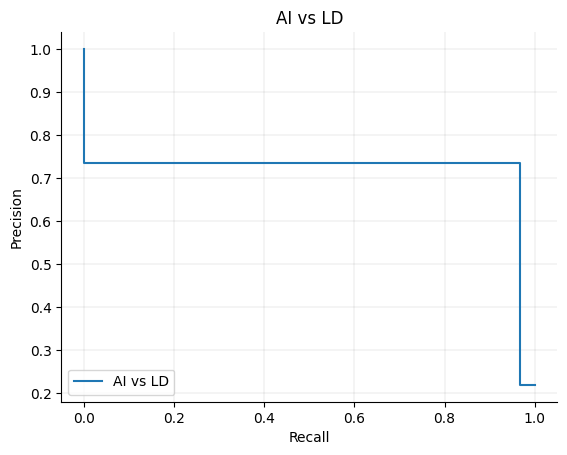

In [129]:
y_true = []
y_pred = []
y_score = []
for file in os.listdir(OUTPUT_DIR):
    # print (file)
    for line in gzip.open(OUTPUT_DIR+file, 'rt'):
        if line.startswith('#') or line.strip().startswith('UserInput'):
            continue
        user_input = line.strip().split()[0]
        # check if the user input is in the df_loss or df_activating
        # if not, then continue
        if user_input not in df_loss['Input'].values and user_input not in df_activating['Input'].values:
            continue
        # print (user_input)
        known_ADR = line.strip().split()[8]
        if known_ADR in ['increase', 'activating']:
            # print (line.strip().split()[-2])
            y_true.append(1)
        elif known_ADR in ['decrease', 'loss']:
            # print (line.strip().split()[-2])
            y_true.append(0)
        else:
            continue
        if ALGO == 'RF':
            ai_v_ld = float(line.strip().split()[-2])
        else:
            ai_v_ld = float(line.strip().split()[16])
        if ai_v_ld > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
        y_score.append(ai_v_ld)

print (len(y_true), len(y_pred))
print (confusion_matrix(y_true, y_pred))
make_plot(y_true, y_pred, 'AI vs LD')

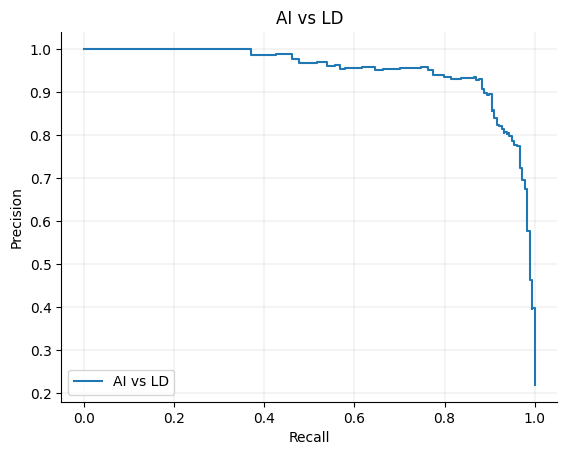

In [130]:
make_plot(y_true, y_score, 'AI vs LD')
# save the plot
plt.savefig('/home/gurdeep/projects/kinaseResistance/ML/precision_recall_curve_AI_vs_LD_' + ALGO + '.png', dpi=1000)

### Precision-Recall curve and confusion matrix for `RvN` in train set

219 219
[[146   1]
 [  1  71]]


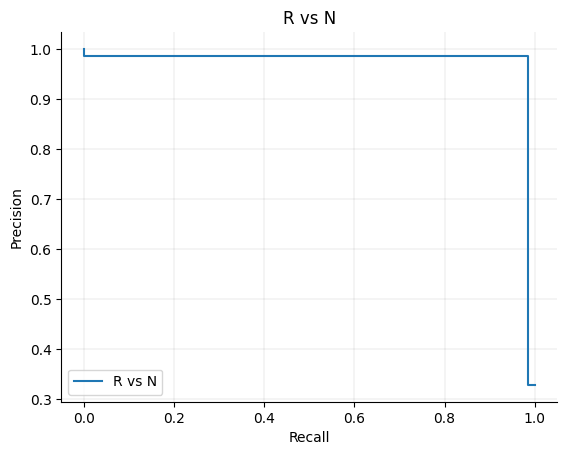

In [131]:
y_true = []
y_pred = []
y_score = []
for file in os.listdir(OUTPUT_DIR):
    # print (file)
    for line in gzip.open(OUTPUT_DIR+file, 'rt'):
        if line.startswith('#') or line.strip().startswith('UserInput'):
            continue
        user_input = line.strip().split()[0]
        # check if the user input is in the df_loss or df_activating
        # if not, then continue
        if user_input not in df_resistance['Input'].values and user_input not in df_neutral['Input'].values:
            continue
        # print (user_input)
        known_ADR = line.strip().split()[8]
        if known_ADR in ['resistance']:
            # print (line.strip().split()[-2])
            y_true.append(1)
        elif known_ADR in ['neutral']:
            # print (line.strip().split()[-2])
            y_true.append(0)
        else:
            continue
        if ALGO == 'RF':
            r_v_n = float(line.strip().split()[-1])
        else:
            r_v_n = float(line.strip().split()[15])
        if r_v_n > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
        y_score.append(r_v_n)

print (len(y_true), len(y_pred))
print (confusion_matrix(y_true, y_pred))
make_plot(y_true, y_pred, 'R vs N')

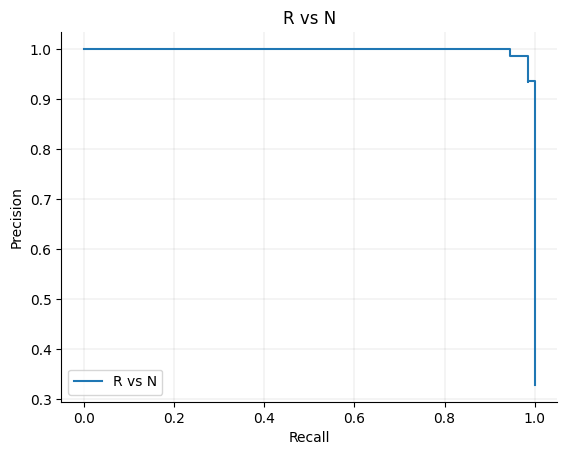

In [132]:
make_plot(y_true, y_score, 'R vs N')
# save the plot
plt.savefig('/home/gurdeep/projects/kinaseResistance/ML/precision_recall_curve_R_vs_N_' + ALGO + '.png', dpi=1000)

### Precision-Recall curve and confusion matrix for `NvDvA` in train set

In [133]:
y_true = []
y_pred = []
y_score = []
for file in os.listdir(OUTPUT_DIR):
    # print (file)
    for line in gzip.open(OUTPUT_DIR+file, 'rt'):
        if line.startswith('#') or line.strip().startswith('UserInput'):
            continue
        user_input = line.strip().split()[0]
        # check if the user input is in the df_loss or df_activating
        # if not, then continue
        if user_input not in df_loss['Input'].values and user_input not in df_activating['Input'].values and user_input not in df_neutral['Input'].values:
            continue
        # print (user_input)
        known_ADR = line.strip().split()[8]
        prob_n = line.strip().split()[10]
        prob_d = line.strip().split()[11]
        prob_a = line.strip().split()[12]
        if known_ADR in ['neutral']:
            # print (line.strip().split()[-2])
            y_true.append([1,0,0])            
        elif known_ADR in ['decrease', 'loss']:
            # print (line.strip().split()[-2])
            y_true.append([0,1,0])
            # y_score.append(float(prob_d))
        elif known_ADR in ['increase', 'activating']:
            # print (line.strip().split()[-2])
            y_true.append([0,0,1])
            # y_score.append(float(prob_a))
        else:
            continue
        y_score.append([float(prob_n), float(prob_d), float(prob_a)])

print (len(y_true), len(y_score))
# print (confusion_matrix(y_true, y_pred))
# make_plot(y_true, y_pred)

958 958


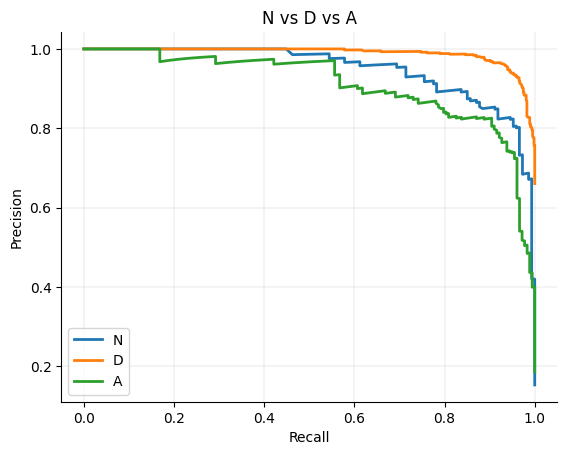

In [134]:
# precision recall curve

Y_test = np.array(y_true)
y_score = np.array(y_score)

precision = dict()
recall = dict()
for i in range(3):
    if i == 0:
        label = 'N'
    elif i == 1:
        label = 'D'
    else:
        label = 'A'
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=label)
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
# Hide the right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title("N vs D vs A")
plt.savefig('/home/gurdeep/projects/kinaseResistance/ML/precision_recall_curve_N_vs_D_vs_A_' + ALGO + '.png', dpi=1000)
plt.show()